# B-scan from a Tree Trunk

In [1]:
import math

def generate_next_step_in_circular_path(x, y, z, cx, cy, cz, radius, num_steps):
    """
    Generates the next step in coordinates for a point (x, y, z) moving in a circular path.
    Parameters:
        x, y, z: Current coordinates of the point.
        cx, cy, cz: Center of the circular path.
        radius: Radius of the circular path.
        num_steps: Total number of steps in the circular path.
    Returns:
        A list of tuples representing the new coordinates [(x1, y1, z1)].
    """

    # Calculate the current angle based on the current coordinates
    dx = x - cx
    dy = y - cy
    current_angle = math.atan2(dy, dx)

    # Calculate the angle increment per step
    angle_increment = 2 * math.pi / num_steps

    # Calculate the new angle for the next step
    new_angle = current_angle + angle_increment

    # Calculate the new coordinates using the new angle and radius
    x_new = cx + radius * math.cos(new_angle)
    y_new = cy + radius * math.sin(new_angle)
    z_new = z + cz  # Assuming no change in the z-coordinate
    
    

    return x_new, y_new, z_new

# Example usage
x = 3
y = 4
z = 0
cx = 0
cy = 0
cz = 0
radius = 5
num_steps = 90

coordinates = []
coordinates.append((x,y,z))
for i in range(0,num_steps-1):
    x_new, y_new, z_new = generate_next_step_in_circular_path(x, y, z, cx, cy, cz, radius, num_steps)
    x = x_new
    y = y_new
    z = z_new
    coordinates.append((x_new, y_new, z_new))

for x,y,z in coordinates:
    print(f"x :{x} , y : {y} , z: {z}")

## Create the input file of the healthy tree

In [3]:
%%writefile test.in
#title: Healthy TreeTrunk
#domain: 1.86 0.81 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 20e-9

#material: 5.22 0.005 1 0 Heartwood
#material: 5.9 0.02 1 0 Inner_Sapwood
#material: 6.1 0.033 1 0 Outer_Sapwood
#material: 6.0 1 1 0 Cabdium
#material: 5.8 0 1 0 Bark

#add_dispersion_debye: 1 18 9.231e-12 Cabdium
#add_dispersion_debye: 1 12.36 9.231e-12 Outer_Sapwood
#add_dispersion_debye: 1 9.66 9.231e-12 Inner_Sapwood
#add_dispersion_debye: 1 1.43 9.231e-12 Heartwood


#waveform: ricker 1 1e9 my_wave
#python:

import math

def next_step_in_circular_path(x, y, z, cx, cy, cz, radius, num_steps):
    """
    Calculates the next step in coordinates for a point (x, y, z) moving in a circular path.
    Parameters:
        x, y, z: Current coordinates of the point.
        cx, cy, cz: Center of the circular path.
        radius: Radius of the circular path.
        num_steps: Number of steps in the circular path.
    Returns:
        The new coordinates (x', y', z') after moving to the next step.
    """
    # Calculate the current angle based on the current coordinates
    dx = x - cx
    dy = y - cy
    current_angle = math.atan2(dy, dx)

    # Calculate the angle increment per step
    angle_increment = 2 * math.pi / num_steps

    # Calculate the new angle for the next step
    new_angle = current_angle + angle_increment

    # Calculate the new coordinates using the new angle and radius
    x_new = cx + radius * math.cos(new_angle)
    y_new = cy + radius * math.sin(new_angle)
    z_new = z + cz  # Assuming no change in the z-coordinate

    return x_new, y_new, z_new

#hertzian_dipole: z 0.03 0.03 0 my_wave
#rx: 0.13 0.03 0
print(f"#src_step: {x_new - x} {y_new - y} {z_new - z}")
#endpython:

#cylinder: 0.93 0.48 0 0.93 0.48 0.002 0.3 Bark
#cylinder: 0.935 0.47 0 0.935 0.47 0.002 0.25 Cabdium
#cylinder: 0.94 0.46 0 0.94 0.46 0.002 0.23 Outer_Sapwood
#cylinder: 0.935 0.46 0 0.935 0.46 0.002 0.18 Inner_Sapwood
#cylinder: 0.93 0.45 0 0.93 0.45 0.002 0.13 Heartwood

##material: 1 0 1 0 cavity

##cylinder: 0.9325 0.2 0 0.285 0.2 0.002 0.07 cavity
#geometry_objects_write: 0.025 0.025 0 1.86 0.81 0.002 test



Overwriting test.in


## Plot A-scan


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

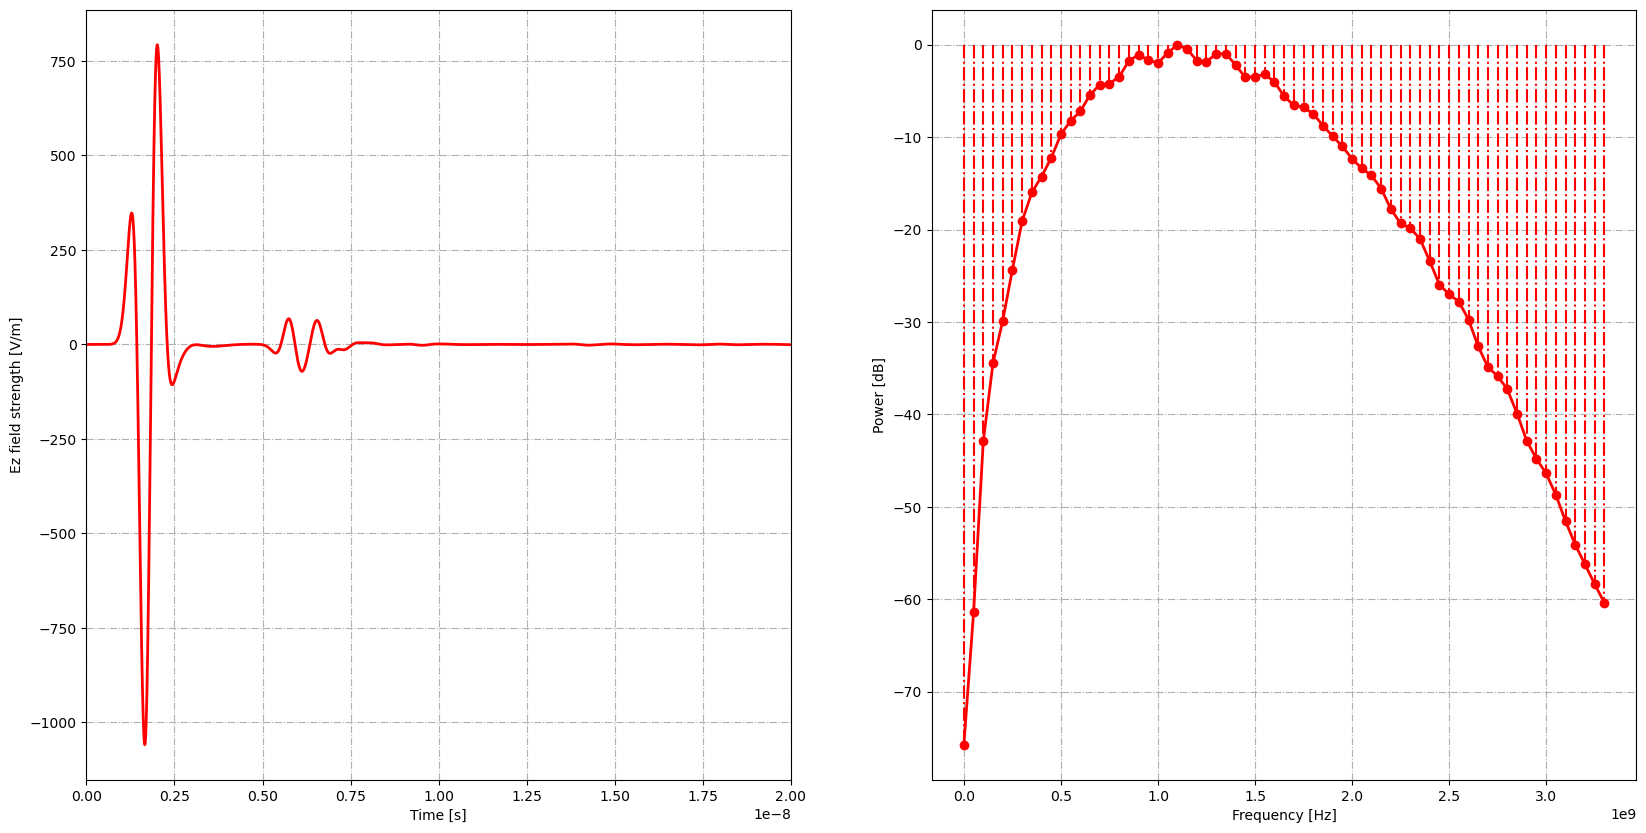

In [3]:
from tools.plot_Ascan import mpl_plot
from gprMax.receivers import Rx
%matplotlib inline

api(filename_g + '.in', n=1, geometry_only=False)

outputs = Rx.defaultoutputs
outputs = ['Ez']
plt = mpl_plot(filename_g + '.out', outputs, fft=True)


## Plot the 2D geometry

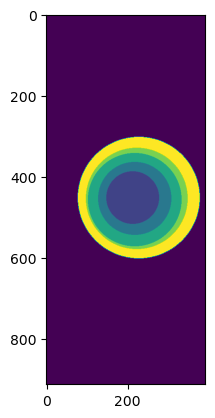

In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File(filename_g + '.h5', 'r')
dset = f['data']

# Generate the image
plt.imshow(dset, cmap='viridis')

# Display the image
plt.show()


## B Scan of the healthy tree

In [4]:
from tools.plot_Bscan import get_output_data, mpl_plot
from tools.outputfiles_merge import merge_files
%matplotlib inline
api(filename_g + '.in', n=b_scan_cnt, geometry_only=False, geometry_fixed=True)

merge_files(filename_g, True)


rxnumber = 1
rxcomponent = 'Ez'
outputdata, dt = get_output_data(
    filename_g + '_merged.out', rxnumber, rxcomponent)
plt = mpl_plot(filename_g + '_merged.out',
               outputdata, dt, rxnumber, rxcomponent)



=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

## Input file of the tree with cavity

In [2]:
%%writefile test.in
#title: Healthy TreeTrunk
#domain: 0.65 0.45 0.002
#dx_dy_dz: 0.002 0.002 0.002
#time_window: 15e-9

#material: 5.22 0.005 1 0 Heartwood
#material: 5.9 0.02 1 0 Inner_Sapwood
#material: 6.1 0.033 1 0 Outer_Sapwood
#material: 6.0 1 1 0 Cabdium
#material: 5.8 0 1 0 Bark

#add_dispersion_debye: 1 18 9.231e-12 Cabdium
#add_dispersion_debye: 1 12.36 9.231e-12 Outer_Sapwood
#add_dispersion_debye: 1 9.66 9.231e-12 Inner_Sapwood
#add_dispersion_debye: 1 1.43 9.231e-12 Heartwood


#waveform: ricker 1 1e9 my_ricker
#hertzian_dipole: z 0.025 0.025 0 my_ricker
#rx: 0.125 0.025 0
#src_steps: 0.002 0 0
#rx_steps: 0.002 0 0

#cylinder: 0.325 0.275 0 0.325 0.275 0.002 0.15 Bark
#cylinder: 0.325 0.275 0 0.325 0.275 0.002 0.135 Cabdium
#cylinder: 0.325 0.275 0 0.325 0.275 0.002 0.1325 Outer_Sapwood
#cylinder: 0.328 0.285 0 0.328 0.285 0.002 0.10 Inner_Sapwood
#cylinder: 0.355 0.305 0 0.355 0.305 0.002 0.065 Heartwood


#material: 1 0 1 0 cavity
#cylinder: 0.285 0.2 0 0.285 0.2 0.002 0.03 cavity
#geometry_objects_write: 0.1 0.08 0 0.475 0.425 0.002 test



Overwriting test.in


## Plot A scan


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

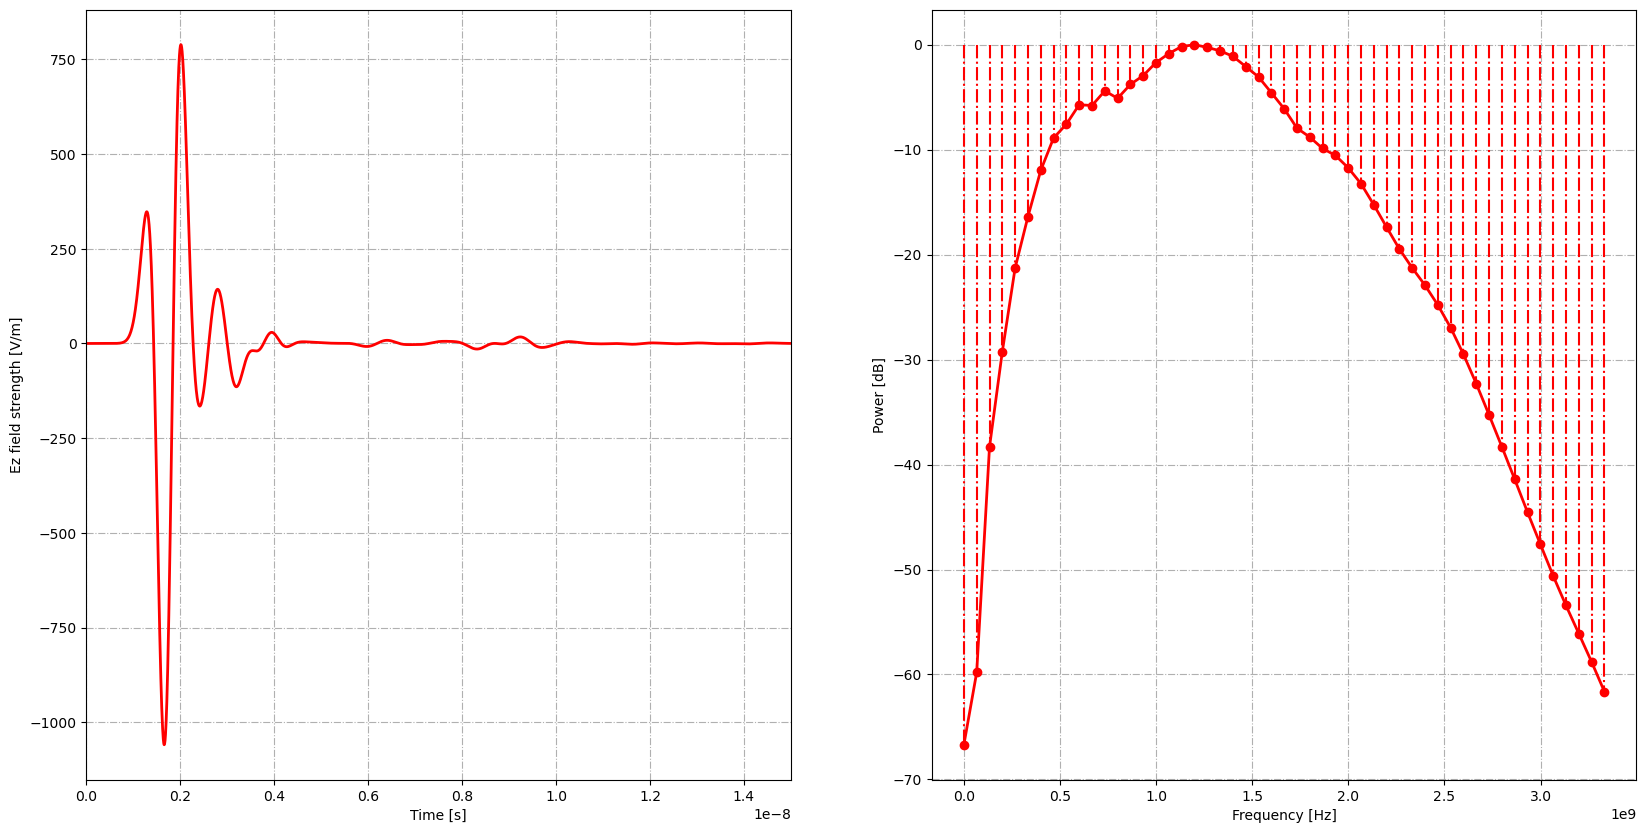

In [4]:
from gprMax.receivers import Rx
from tools.plot_Ascan import mpl_plot

api(filename_g + '.in', n=1, geometry_only=False)

outputs = Rx.defaultoutputs
outputs = ['Ez']
plt = mpl_plot(filename_g + '.out', outputs, fft=True)


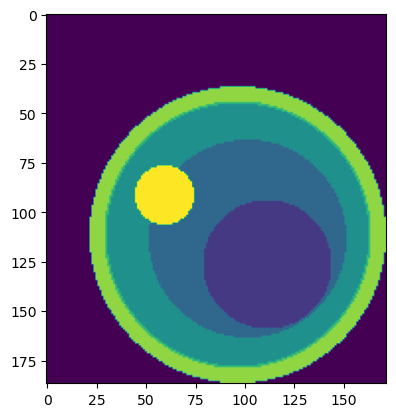

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File(filename_g + '.h5', 'r')
dset = f['data']

# Generate the image
plt.imshow(dset, cmap='viridis')

# Display the image
plt.show()


## Run the model

In [3]:
api(filename_g + '.in', n=b_scan_cnt, geometry_only=False, geometry_fixed=True)



=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.6 (Big Smoke)

 Copyright (C) 2015-2023: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

## View the results

### Merge A-scans into B-scan

In [4]:
from tools.outputfiles_merge import merge_files
merge_files(filename_g, True)


### Plot the B-scan

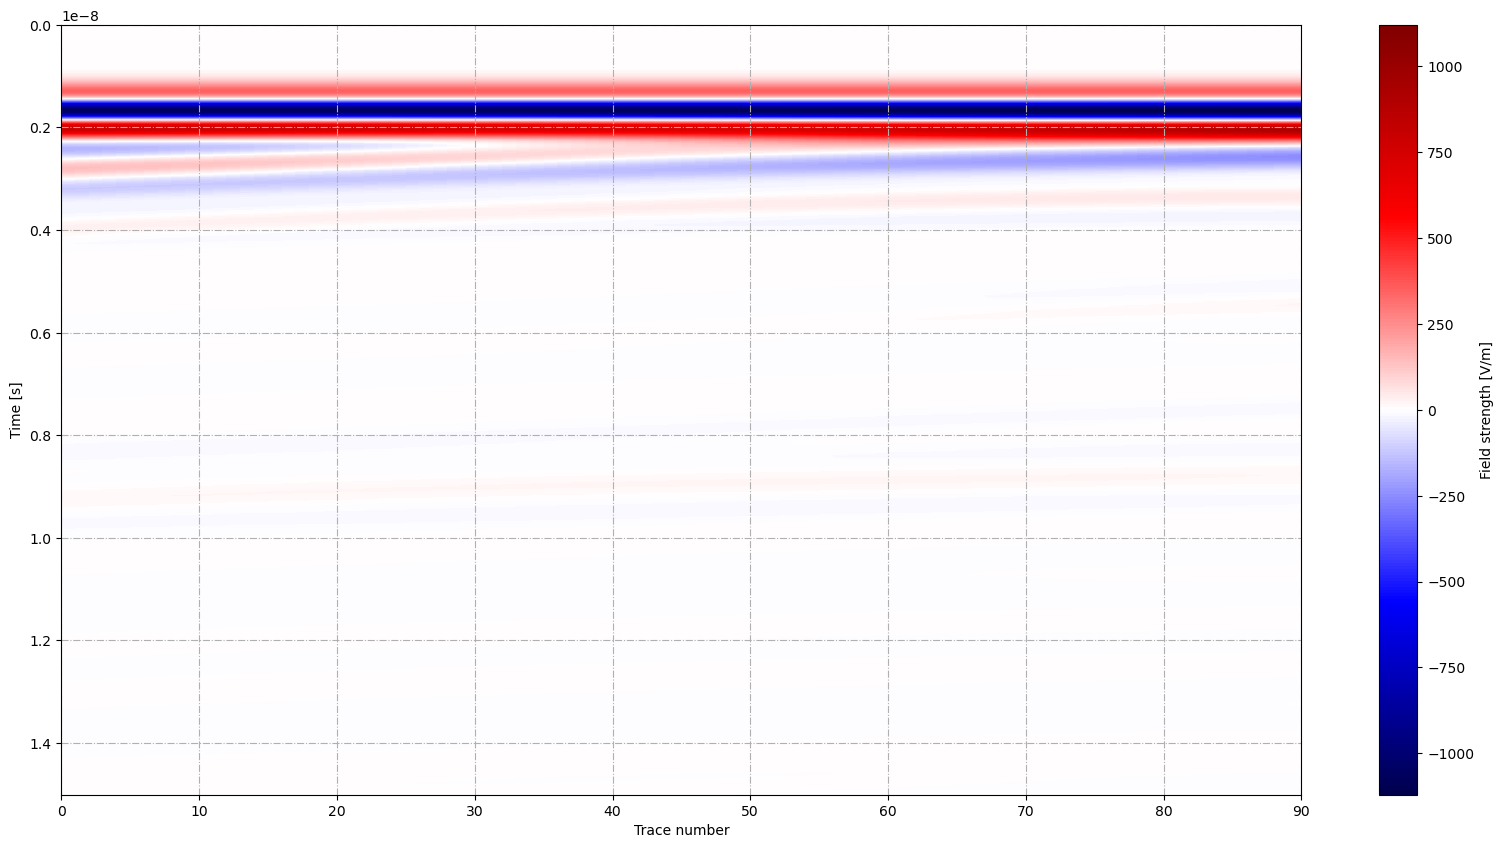

In [7]:
from tools.plot_Bscan import get_output_data, mpl_plot
%matplotlib inline

rxnumber = 1
rxcomponent = 'Ez'
outputdata, dt = get_output_data(
    filename_g + '_merged.out', rxnumber, rxcomponent)
plt = mpl_plot(filename_g + '_merged.out', outputdata, dt, rxnumber, rxcomponent)

# # Change from the default 'seismic' colormap
# plt.set_cmap('gray')
